<p style="visibility: hidden; text-align: right">Отчет</p>
<div style = "width: 100%; color: #373738; font-size: 18px; font-family: Times New Roman; opacity: 0.8">
    


<p style="text-align: center; font-size: 25px; font-weight: bold">Оптимизация восстановления золота из золотосодержащей руды
    

<p style="text-align: center;">проектирование модели машинного обучения, в целях прогнозирования коэффициента восстановления


</div>
   

<h2 style="visibility: hidden; text-align: right">Введение </h2>
<div style = "width: 100%; color: #373738; font-size: 18px; font-family: Times New Roman; opacity: 0.8">
    


<p style="text-align: center; font-size: 25px; font-weight: bold">1. Введение
    

</div>


<div style="display: flex; margin-left: 2px; tex-align:justify; opacity: 0.9">

<div style = "max-width: 100%; margin-left: 0px; margin-top: 15px; background: #ffffff; border: 1px solid #b0b1b2; border-radius: 2px 2px 2px 2px; margin-bottom:20px; color: #373738; font-size: 14px; padding-left: 10px; padding-right: 10px; padding-top: 15px; padding-bottom: 10px;font-family: Times New Roman; opacity: 0.9; tex-align:justify; box-shadow: 1px 1px 5px #c1c3c5">
    
$\hspace{1.0cm}$Врамках проекта буддет рассмотрена задача анализа и прогнозирования данных золотодобывающей отрасли, в целях оптимизации производства, а также предотвращения запуска предприятия с убыточными характеристиками.
<br>
$\hspace{1.0cm}$В ходе проект предстоит подготовить прототип машинного обучения для компании, разрабатывающей решения для эффективной работы промышленных предприятий.
<br>
$\hspace{1.0cm}$Модель должна будет предсказать коэффициент восстановления золота из золотосодержащей руды. 
<br>    
$\hspace{1.0cm}$Для подготовки прототипа модели предоставлены данные с параметрами добычи и очистки:<br> 

$Технологический процесс$:
- Rougher feed — исходное сырье
- Rougher additions (или reagent additions) — флотационные реагенты:
    
    - Xanthate **— ксантогенат (промотер, или активатор флотации);
    - Sulphate — сульфат (на данном производстве сульфид натрия);
    - Depressant — депрессант (силикат натрия).
- Rougher process (англ. «грубый процесс») — флотация
- Rougher tails — отвальные хвосты
- Float banks — флотационная установка
- Cleaner process — очистка
- Rougher Au — черновой концентрат золота
- Final Au — финальный концентрат золота<br>
     
$Параметры этапов$:
- air amount — объём воздуха
- fluid levels — уровень жидкости
- feed size — размер гранул сырья
- feed rate — скорость подачи<br> 

$Наименование признаков$<br>
$\hspace{1.0cm}$Наименование признаков формируется в следующей структуре:
> $[этап].[тип параметра].[название параметра]$ (Пример: rougher.input.feed_ag)<br>

    
   
$\hspace{1.0cm}$Возможные значения для блока ***`[этап]`***:<br>
- rougher — флотация
- primary_cleaner — первичная очистка
- secondary_cleaner — вторичная очистка
- final — финальные характеристики<br>
    
$\hspace{1.0cm}$Возможные значения для блока ***`[тип_параметра]`***:<br>
- input — параметры сырья
- output — параметры продукта
- state — параметры, характеризующие текущее состояние этапа
- calculation — расчётные характеристики<br>

$\hspace{1.0cm}$План выполнения проекта:
- подготовить данные
- провести исследовательский анализ данных
- построить и обучить модели
- протестировать модели и выбрать лучшую

</div>
</div>

<h2 style="visibility: hidden; text-align: right">Импорт библиотек</h2>
<div style = "width: 100%; color: #373738; font-size: 18px; font-family: Times New Roman; opacity: 0.8">
    


<p style="text-align: center; font-size: 25px; font-weight: bold">2. Импорт библиотек
    

</div>  
 

<div style="display: flex; margin-left: 2px; tex-align:justify; opacity: 0.9">

<div style = "width: 100%; margin-left: 0px; margin-top: 15px; background: #ffffff; border: 1px solid #b0b1b2; border-radius: 2px 2px 2px 2px; margin-bottom:20px; color: #373738; font-size: 14px; padding-left: 10px; padding-right: 10px; padding-top: 15px; padding-bottom: 10px;font-family: Times New Roman; opacity: 0.9; tex-align:justify; box-shadow: 1px 1px 5px #c1c3c5">
    
$\hspace{1.0cm}$Произведем импорт необходимых библиотек

</div>
</div>

In [1]:
from IPython.display import clear_output

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

%matplotlib inline

import numpy as np

import optuna

import pandas as pd

import seaborn as sns

from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lars
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoLars
from sklearn.linear_model import MultiTaskElasticNet
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor

<div style="display: flex; margin-left: 2px; tex-align:justify; opacity: 0.9">

<div style = "width: 100%; margin-left: 0px; margin-top: 15px; background: #ffffff; border: 1px solid #b0b1b2; border-radius: 2px 2px 2px 2px; margin-bottom:20px; color: #373738; font-size: 14px; padding-left: 10px; padding-right: 10px; padding-top: 15px; padding-bottom: 10px;font-family: Times New Roman; opacity: 0.9; tex-align:justify; box-shadow: 1px 1px 5px #c1c3c5">
    
$\hspace{1.0cm}$Зададим глобальные параметры для вывода таблиц данных и графиков 

</div>
</div>


In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)
sns.set(style="whitegrid")  

<h2 style="visibility: hidden; text-align: right">Импорт данных и ознакомление</h2>
<div style = "width: 100%; color: #373738; font-size: 18px; font-family: Times New Roman; opacity: 0.8">
    


<p style="text-align: center; font-size: 25px; font-weight: bold">3. Импорт данных и ознакомление
    

</div>  

<div style="display: flex; margin-left: 2px; tex-align:justify; opacity: 0.9">

<div style = "width: 100%; margin-left: 0px; margin-top: 15px; background: #ffffff; border: 1px solid #b0b1b2; border-radius: 2px 2px 2px 2px; margin-bottom:20px; color: #373738; font-size: 14px; padding-left: 10px; padding-right: 10px; padding-top: 15px; padding-bottom: 10px;font-family: Times New Roman; opacity: 0.9; tex-align:justify; box-shadow: 1px 1px 5px #c1c3c5">
    
$\hspace{1.0cm}$Произведем импорт массивов данных с помощью метода ***`read_csv`*** библиотеки ***`pandas`*** из файлов: 
- ***`gold_recovery_full_new.csv`*** в переменную ***`full_data`***
- ***`gold_recovery_train_new.csv`*** в переменную ***`train_data`***
- ***`gold_recovery_test_new.csv`*** в переменную ***`test_data`***

    
    
    
(с помощью ***`try`***, ***`except`***  обеспечим вариативность источников импорта)

</div>
</div>


In [3]:
try:
    full_data = pd.read_csv('/datasets/gold_recovery_full_new.csv')
    test_data = pd.read_csv('/datasets/gold_recovery_test_new.csv')
    train_data = pd.read_csv('/datasets/gold_recovery_train_new.csv')

except:
    full_data = pd.read_csv('gold_recovery_full_new.csv')
    test_data = pd.read_csv('gold_recovery_test_new.csv')
    train_data = pd.read_csv('gold_recovery_train_new.csv')

<div style="display: flex; margin-left: 2px; tex-align:justify; opacity: 0.9">

<div style = "width: 100%; margin-left: 0px; margin-top: 15px; background: #ffffff; border: 1px solid #b0b1b2; border-radius: 2px 2px 2px 2px; margin-bottom:20px; color: #373738; font-size: 14px; padding-left: 10px; padding-right: 10px; padding-top: 15px; padding-bottom: 10px;font-family: Times New Roman; opacity: 0.9; tex-align:justify; box-shadow: 1px 1px 5px #c1c3c5">
    

$\hspace{1.0cm}$В целях ознакомления с составом и структурой данных вывдем для каждого сформированного датафрейма его головную часть (методом ***`head`***), а также подробную информацию о составе данных с помощью метода ***`info`***.

</div>
</div>


In [4]:
full_data.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.

In [5]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


In [6]:
train_data.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


In [8]:
test_data.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,1399.001695,-499.485144,13.128569,5.636710,489.793655,62.710452,42.022440,12.084103,16.922877,6.153479,16.867518,6.150709,1001.849317,-350.301265,1249.738612,-399.107531,1249.750520,-399.396730,1198.287855,-399.488594,999.472250,-399.530962,949.566189,-398.180807,24.938200,-500.490963,14.947607,-500.013837,20.018166,-450.395995,13.987058,-449.831513,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,1399.508091,-500.416324,13.036280,5.526065,490.104534,61.961163,41.187903,11.918977,17.002532,5.999043,16.996063,6.002315,998.690785,-350.425704,1248.395457,-399.946025,1249.514451,-399.630810,1200.506459,-399.942434,1000.002114,-399.491528,950.200009,-405.787514,24.923466,-499.813963,14.930873,-500.764452,19.988503,-450.114024,14.092981,-450.059163,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,1399.497088,-499.715479,13.138412,5.426561,489.617969,66.903807,42.546294,12.091332,16.992520,5.850632,16.982096,5.853594,998.516720,-349.783538,1247.440748,-400.264330,1248.207204,-401.074405,1199.770026,-400.790582,999.925519,-399.236999,950.320481,-400.864340,24.908732,-500.304035,14.996511,-500.993821,20.039689,-450.263164,14.077881,-449.660997,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,1401.065165,-501.038738,12.400507,5.114758,476.618130,59.865919,41.060195,12.181597,16.532144,5.801935,16.515277,5.803657,1000.276604,-350.172597,1251.322675,-398.655289,1250.493702,-399.746728,1199.398691,-397.50

In [9]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

<div style="display: flex; margin-left: 2px; tex-align:justify; opacity: 0.9">

<div style = "width: 100%; margin-left: 0px; margin-top: 15px; background: #ffffff; border: 1px solid #b0b1b2; border-radius: 2px 2px 2px 2px; margin-bottom:20px; color: #373738; font-size: 14px; padding-left: 10px; padding-right: 10px; padding-top: 15px; padding-bottom: 10px;font-family: Times New Roman; opacity: 0.9; tex-align:justify; box-shadow: 1px 1px 5px #c1c3c5">
    

$\hspace{1.0cm}$По итогам ознакомления с составом и структурой данных, можно сделать следующие выводы:
- все данные по всем трем выборкам, за исключением одного категориального показателя ***`date`***, представленного типом данных ***`object`***,  представлены числовыми показателями с типом данных ***`float64`***
- во всех трех выборках присутствуют пропущенные значения, количество которых в рамках одного показателя не велико
- состав показателей выборок ***`train_data`*** и ***`test_data`*** отличается, ***`test_data`*** содержит меньше показателей, а следовательно при обработке данных, для использования данных при обучении и тестировании моделей, необходимо будет привести их к единообразию
</div>
</div>


<h2 style="visibility: hidden; text-align: right">Импорт данных и ознакомлениеПроверка расчета эффективности обогащения</h2>
<div style = "width: 100%; color: #373738; font-size: 18px; font-family: Times New Roman; opacity: 0.8">
    


<p style="text-align: center; font-size: 25px; font-weight: bold">4. Проверка расчета эффективности обогащения
    

</div>

<div style="display: flex; margin-left: 2px; tex-align:justify; opacity: 0.9">

<div style = "width: 100%; margin-left: 0px; margin-top: 15px; background: #ffffff; border: 1px solid #b0b1b2; border-radius: 2px 2px 2px 2px; margin-bottom:20px; color: #373738; font-size: 14px; padding-left: 10px; padding-right: 10px; padding-top: 15px; padding-bottom: 10px;font-family: Times New Roman; opacity: 0.9; tex-align:justify; box-shadow: 1px 1px 5px #c1c3c5">
    


$\hspace{1.0cm}$В целях проверки расчетной величины эффеективности обогащения, произведем самостоятельный рачет данной велечины на обучающей выборке (***`train_data`***) данных, после чего сравним полученные результаты и с представленными данными в выборке. Эффективность обогащения рассчитывается по формуле:
</div>
</div>
    

    
    
    
<div align="center" style = "padding:15px"><div align="left" style = "width:35%; padding:10px; background-color: #ececec; box-shadow:1px 1px 2px 2px #b2b2b2; border-radius: 1px 10px"><font padding=""  style="color:#7c7c7d; font-size:16px; text-shadow: 1px 1px 3px #d1d2d3">
    
$Recovery= \frac {C\hspace{0.2cm}\times\hspace{0.2cm} ( F - T )}{F\hspace{0.2cm}\times\hspace{0.2cm}( C - T )} \times 100\% $
    
</div>

    
<div style="display: flex; margin-left: 2px; tex-align:justify; opacity: 0.9">

<div style = "width: 100%; margin-left: 0px; margin-top: 15px; background: #ffffff; border: 1px solid #b0b1b2; border-radius: 2px 2px 2px 2px; margin-bottom:20px; color: #373738; font-size: 14px; padding-left: 10px; padding-right: 10px; padding-top: 15px; padding-bottom: 10px;font-family: Times New Roman; opacity: 0.9; tex-align:justify; box-shadow: 1px 1px 5px #c1c3c5">
    


Где:
    
$C$ — доля золота в концентрате после флотации/очистки (***`rougher.output.concentrate_au`***);<br>
$F$ — доля золота в сырье/концентрате до флотации/очистки (***`rougher.input.feed_au`***);<br>
$T$ — доля золота в отвальных хвостах после флотации/очистки (***`rougher.output.tail_au`***).<br>

    
$\hspace{1.0cm}$Для проведения расчета скопируем данные обучающей выборки(в составе необходимых для расчета признаков) в отдельный датафрейм ***`calc_data`***.
</div>
</div>    


    
    


In [10]:
calc_data = train_data.copy()[
    ['rougher.input.feed_au', 
     'rougher.output.concentrate_au',
     'rougher.output.tail_au',
     'rougher.output.recovery'
    ]
].dropna().reset_index(drop=True)

<div style="display: flex; margin-left: 2px; tex-align:justify; opacity: 0.9">

<div style = "width: 100%; margin-left: 0px; margin-top: 15px; background: #ffffff; border: 1px solid #b0b1b2; border-radius: 2px 2px 2px 2px; margin-bottom:20px; color: #373738; font-size: 14px; padding-left: 10px; padding-right: 10px; padding-top: 15px; padding-bottom: 10px;font-family: Times New Roman; opacity: 0.9; tex-align:justify; box-shadow: 1px 1px 5px #c1c3c5">
    


$\hspace{1.0cm}$Произведем расчет показателя эффективности обогащения согласно формуле
</div>
</div>

In [11]:
recovery = (
    (calc_data['rougher.output.concentrate_au'] *
     (calc_data['rougher.input.feed_au'] - calc_data['rougher.output.tail_au'])
    ) /
     (calc_data['rougher.input.feed_au'] *
     (calc_data['rougher.output.concentrate_au'] - calc_data['rougher.output.tail_au'])
    ) * 100
)

<div style="display: flex; margin-left: 2px; tex-align:justify; opacity: 0.9">

<div style = "width: 100%; margin-left: 0px; margin-top: 15px; background: #ffffff; border: 1px solid #b0b1b2; border-radius: 2px 2px 2px 2px; margin-bottom:20px; color: #373738; font-size: 14px; padding-left: 10px; padding-right: 10px; padding-top: 15px; padding-bottom: 10px;font-family: Times New Roman; opacity: 0.9; tex-align:justify; box-shadow: 1px 1px 5px #c1c3c5">
    



$\hspace{1.0cm}$Присоединим полученное значение расчетной величины присоеденим к изначальному рассчетному датафрейму в виде столбца ***`rougher.output.recovery_calc`***
</div>
</div>


In [12]:
calc_data = pd.concat([calc_data, recovery], axis=1)
calc_data.rename(columns={0:'rougher.output.recovery_calc'}, inplace=True)
# calc_data['delta'] = calc_data['rougher.output.recovery'] - calc_data['rougher.output.recovery_calc']
calc_data.head()

,rougher.input.feed_au,rougher.output.concentrate_au,rougher.output.tail_au,rougher.output.recovery,rougher.output.recovery_calc
0,6.486150,19.793808,1.170244,87.107763,87.107763
1,6.478583,20.050975,1.184827,86.843261,86.843261
2,6.362222,19.737170,1.162562,86.842308,86.842308
3,6.118189,19.320810,1.079755,87.226430,87.226430
4,5.663707,19.216101,1.012642,86.688794,86.688794


<div style="display: flex; margin-left: 2px; tex-align:justify; opacity: 0.9">

<div style = "width: 100%; margin-left: 0px; margin-top: 15px; background: #ffffff; border: 1px solid #b0b1b2; border-radius: 2px 2px 2px 2px; margin-bottom:20px; color: #373738; font-size: 14px; padding-left: 10px; padding-right: 10px; padding-top: 15px; padding-bottom: 10px;font-family: Times New Roman; opacity: 0.9; tex-align:justify; box-shadow: 1px 1px 5px #c1c3c5">
    



$\hspace{1.0cm}$C помощью метрики средней абсолютной ошибки ***`mean_absolute_error`*** библиотеки ***`sklearn`*** произведем оценку качества рассчетной величины ***`rougher.output.recovery`***
</div>
</div>


In [13]:
mean_absolute_error(calc_data['rougher.output.recovery'], calc_data['rougher.output.recovery_calc'])

9.73512347450521e-15

<div style="display: flex; margin-left: 2px; tex-align:justify; opacity: 0.9">

<div style = "width: 100%; margin-left: 0px; margin-top: 15px; background: #ffffff; border: 1px solid #b0b1b2; border-radius: 2px 2px 2px 2px; margin-bottom:20px; color: #373738; font-size: 14px; padding-left: 10px; padding-right: 10px; padding-top: 15px; padding-bottom: 10px;font-family: Times New Roman; opacity: 0.9; tex-align:justify; box-shadow: 1px 1px 5px #c1c3c5">
    




$\hspace{1.0cm}$Как мы видим значение метрики ничтожно мало (***`9.73512347450521e-15`***), а его наличие скорее всего обусловлено различиями в максимальном количестве знаков после запятой, принятом при расчете данных для датафрейма и при оценочном рассчете.
    
    
$\hspace{1.0cm}$Основываясь на таком показателе метрики мы можем утверждать, что величина эффективности обогащения рассчитана верно
</div>
</div>


<h2 style="visibility: hidden; text-align: right">Анализ состава показателей тестовой выборки</h2>
<div style = "width: 100%; color: #373738; font-size: 18px; font-family: Times New Roman; opacity: 0.8">
    


<p style="text-align: center; font-size: 25px; font-weight: bold">5. Анализ состава показателей тестовой выборки
    

</div>


<div style="display: flex; margin-left: 2px; tex-align:justify; opacity: 0.9">

<div style = "width: 100%; margin-left: 0px; margin-top: 15px; background: #ffffff; border: 1px solid #b0b1b2; border-radius: 2px 2px 2px 2px; margin-bottom:20px; color: #373738; font-size: 14px; padding-left: 10px; padding-right: 10px; padding-top: 15px; padding-bottom: 10px;font-family: Times New Roman; opacity: 0.9; tex-align:justify; box-shadow: 1px 1px 5px #c1c3c5">
    


$\hspace{1.0cm}$Рассмотрим состав показателей тестовой выборки (***`test_data`***)
</div>
</div>


In [14]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

<div style="display: flex; margin-left: 2px; tex-align:justify; opacity: 0.9">

<div style = "width: 100%; margin-left: 0px; margin-top: 15px; background: #ffffff; border: 1px solid #b0b1b2; border-radius: 2px 2px 2px 2px; margin-bottom:20px; color: #373738; font-size: 14px; padding-left: 10px; padding-right: 10px; padding-top: 15px; padding-bottom: 10px;font-family: Times New Roman; opacity: 0.9; tex-align:justify; box-shadow: 1px 1px 5px #c1c3c5">
    


$\hspace{1.0cm}$Состав показателей тестовой выборки (***`test_data`***) представвлен показателями состояния флотационной установки ***`state.floatbank`*** на различных этапах технологического процесса, размера гранул сырья ***`feed size`***, а также характеристик сырья на входном участке ***`input`***.
    
    
    
$\hspace{1.0cm}$Набор признаков тетовой выборки является определяющим для дальнейшего прогнозирования результатов эффективности обогащения. А следовательно если наша тестовая выборка ограничена данным набором признаков, то обучение моделей необходимо будет производить на основании такого же набора признаков.
    
    
    
    
$\hspace{1.0cm}$Исходя из этого можем сделать вывод, что обучающую выборку нужно будет ограничить в рамках объема показателей тестовой выборки.
</div>
</div>
    



<h2 style="visibility: hidden; text-align: right">Анализ состава показателей тестовой выборки</h2>
<div style = "width: 100%; color: #373738; font-size: 18px; font-family: Times New Roman; opacity: 0.8">
    


<p style="text-align: center; font-size: 25px; font-weight: bold">6. Предобработка данных
    

</div>


<div style="display: flex; margin-left: 2px; tex-align:justify; opacity: 0.9">

<div style = "width: 100%; margin-left: 0px; margin-top: 15px; background: #ffffff; border: 1px solid #b0b1b2; border-radius: 2px 2px 2px 2px; margin-bottom:20px; color: #373738; font-size: 14px; padding-left: 10px; padding-right: 10px; padding-top: 15px; padding-bottom: 10px;font-family: Times New Roman; opacity: 0.9; tex-align:justify; box-shadow: 1px 1px 5px #c1c3c5">
    


$\hspace{1.0cm}$Сначала обработаем обучающую выборку ***`train_data`*** и ограничим состав показателей в соостветствии с тестовой выборкой ***`test_data.columns`***, а также сохраним целевые признаки ***`rougher.output.recovery`***, ***`final.output.recovery`***

</div>
</div>
    


In [15]:
train_data = train_data[list(test_data.columns) + ['rougher.output.recovery', 'final.output.recovery']]
train_data.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.output.recovery,final.output.recovery
0,2016-01-15 00:00:00,127.092003,10.128295,7.25,0.988759,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,87.107763,70.541216
1,2016-01-15 01:00:00,125.629232,10.296251,7.25,1.002663,1576.166671,-500.904965,1575.950626,-499.865889,1575.994189,-499.315107,1574.479259,-498.931665,6.161113,2.266033,525.290581,57.278666,35.753385,6.478583,11.971193,6.005766,11.996163,6.012594,1000.286398,-400.065196,1600.754587,-449.953435,1600.479580,-449.830646,1600.527589,-449.953649,1399.227084,-450.869848,1399.719514,-450.119001,25.880539,-499.989656,23.889530,-500.372428,23.970550,-500.085473,22.085714,-499.446897,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184,86.843261,69.266198
2,2016-01-15 02:00:00,123.819808,11.316280,7.25,0.991265,1601.556163,-499.997791,1600.386685,-500.607762,1602.003542,-500.870069,1599.541515,-499.827444,6.116455,2.159622,530.026610,57.510649,35.971630,6.362222,11.920603,6.197377,11.920305,6.204633,999.719565,-400.074028,1599.337330,-450.008530,1599.672797,-449.954491,1599.849325,-449.954185,1399.180945,-449.937588,1400.316682,-450.527147,26.005245,-499.929616,23.886657,-499.951928,23.913535,-499.442343,23.957717,-499.901982,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363,86.842308,68.116445
3,2016-01-15 03:00:00,122.270188,11.322140,7.25,0.996739,1599.968720,-500.951778,1600.659236,-499.677094,1600.304144,-500.727997,1600.449520,-500.052575,6.043309,2.037807,542.590390,57.792734,36.862241,6.118189,11.630094,6.203177,11.692450,6.196578

<div style="display: flex; margin-left: 2px; tex-align:justify; opacity: 0.9">

<div style = "width: 100%; margin-left: 0px; margin-top: 15px; background: #ffffff; border: 1px solid #b0b1b2; border-radius: 2px 2px 2px 2px; margin-bottom:20px; color: #373738; font-size: 14px; padding-left: 10px; padding-right: 10px; padding-top: 15px; padding-bottom: 10px;font-family: Times New Roman; opacity: 0.9; tex-align:justify; box-shadow: 1px 1px 5px #c1c3c5">
    


$\hspace{1.0cm}$Чтобы обеспечить возможность тестирования точности работы моделей присоединим целевые признаки ***`rougher.output.recovery`***, ***`final.output.recovery`*** из основного датафрейма ***`full_data`*** к тестовой выборке ***`test_data`***. В качестве "ключа" для присоединения данных используем показатель ***`date`*** 


</div>
</div>
    
    


In [16]:
test_data = test_data.merge(full_data[['date', 'rougher.output.recovery', 'final.output.recovery']], on='date', how='left')
test_data.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.output.recovery,final.output.recovery
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,1399.001695,-499.485144,13.128569,5.636710,489.793655,62.710452,42.022440,12.084103,16.922877,6.153479,16.867518,6.150709,1001.849317,-350.301265,1249.738612,-399.107531,1249.750520,-399.396730,1198.287855,-399.488594,999.472250,-399.530962,949.566189,-398.180807,24.938200,-500.490963,14.947607,-500.013837,20.018166,-450.395995,13.987058,-449.831513,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414,89.993421,70.273583
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,1399.508091,-500.416324,13.036280,5.526065,490.104534,61.961163,41.187903,11.918977,17.002532,5.999043,16.996063,6.002315,998.690785,-350.425704,1248.395457,-399.946025,1249.514451,-399.630810,1200.506459,-399.942434,1000.002114,-399.491528,950.200009,-405.787514,24.923466,-499.813963,14.930873,-500.764452,19.988503,-450.114024,14.092981,-450.059163,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438,88.089657,68.910432
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,1399.497088,-499.715479,13.138412,5.426561,489.617969,66.903807,42.546294,12.091332,16.992520,5.850632,16.982096,5.853594,998.516720,-349.783538,1247.440748,-400.264330,1248.207204,-401.074405,1199.770026,-400.790582,999.925519,-399.236999,950.320481,-400.864340,24.908732,-500.304035,14.996511,-500.993821,20.039689,-450.263164,14.077881,-449.660997,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559,88.412756,68.143213
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,1401.065165,-501.038738,12.400507,5.114758,476.618130,59.865919,41.060195,12.181597,16.532144,5.801935,16.5

<div style="display: flex; margin-left: 2px; tex-align:justify; opacity: 0.9">

<div style = "width: 100%; margin-left: 0px; margin-top: 15px; background: #ffffff; border: 1px solid #b0b1b2; border-radius: 2px 2px 2px 2px; margin-bottom:20px; color: #373738; font-size: 14px; padding-left: 10px; padding-right: 10px; padding-top: 15px; padding-bottom: 10px;font-family: Times New Roman; opacity: 0.9; tex-align:justify; box-shadow: 1px 1px 5px #c1c3c5">
    

   

$\hspace{1.0cm}$Оценим объем пропущенных значений в обучающей и тестовой выборках в процентном соотношении к общему объему данных
</div>
</div>
    


In [17]:
(train_data.isna().sum() / len(train_data) * 100).sort_values(ascending=False).head(10)

rougher.state.floatbank10_e_air             3.081490
rougher.input.floatbank11_xanthate          3.024949
secondary_cleaner.state.floatbank2_a_air    1.533677
rougher.input.feed_size                     1.017740
rougher.input.feed_pb                       0.706764
primary_cleaner.input.xanthate              0.706764
rougher.input.feed_sol                      0.551276
rougher.input.floatbank11_sulfate           0.254435
primary_cleaner.input.depressant            0.226164
rougher.input.floatbank10_sulfate           0.204961
dtype: float64

In [18]:
(test_data.isna().sum() / len(test_data) * 100).sort_values(ascending=False).head(10)

rougher.input.floatbank11_xanthate          0.472590
rougher.input.feed_sol                      0.396975
secondary_cleaner.state.floatbank3_a_air    0.170132
rougher.input.floatbank11_sulfate           0.151229
primary_cleaner.input.depressant            0.094518
rougher.input.floatbank10_sulfate           0.094518
primary_cleaner.input.xanthate              0.075614
primary_cleaner.input.sulfate               0.075614
secondary_cleaner.state.floatbank2_a_air    0.056711
rougher.input.feed_rate                     0.056711
dtype: float64

<div style="display: flex; margin-left: 2px; tex-align:justify; opacity: 0.9">

<div style = "width: 100%; margin-left: 0px; margin-top: 15px; background: #ffffff; border: 1px solid #b0b1b2; border-radius: 2px 2px 2px 2px; margin-bottom:20px; color: #373738; font-size: 14px; padding-left: 10px; padding-right: 10px; padding-top: 15px; padding-bottom: 10px;font-family: Times New Roman; opacity: 0.9; tex-align:justify; box-shadow: 1px 1px 5px #c1c3c5">
    


$\hspace{1.0cm}$Объем пропущенных значений в обучающей и тестовой выборках незначителен, большая часть призноков содержит менее `1%` пропушенных показателейю
    
    
$\hspace{1.0cm}$Из условий постановки задачи нам известно, что соседние по времени параметры часто похожи, а следовательно можно заменить пропущенные значения методом ***`ffill`***

    
    
$\hspace{1.0cm}$Реализуем небольшую функцию для замены пропущенных значений и применим ее к обучающей и тестовой выборке.
</div>
</div>
    


In [19]:
def preprocessing_data(data):
    data = data.fillna(method='ffill', inplace=True)
    return data

preprocessing_data(train_data)
preprocessing_data(test_data)

<div style="display: flex; margin-left: 2px; tex-align:justify; opacity: 0.9">

<div style = "width: 100%; margin-left: 0px; margin-top: 15px; background: #ffffff; border: 1px solid #b0b1b2; border-radius: 2px 2px 2px 2px; margin-bottom:20px; color: #373738; font-size: 14px; padding-left: 10px; padding-right: 10px; padding-top: 15px; padding-bottom: 10px;font-family: Times New Roman; opacity: 0.9; tex-align:justify; box-shadow: 1px 1px 5px #c1c3c5">
    


$\hspace{1.0cm}$Проверим данные на наличие пропусков после обработки
</div>
</div>



In [20]:
f"Пропущенные значения  train_data: {train_data.isna().sum().sum()}  test_data: {test_data.isna().sum().sum()}"

'Пропущенные значения  train_data: 0  test_data: 0'

<div style="display: flex; margin-left: 2px; tex-align:justify; opacity: 0.9">

<div style = "width: 100%; margin-left: 0px; margin-top: 15px; background: #ffffff; border: 1px solid #b0b1b2; border-radius: 2px 2px 2px 2px; margin-bottom:20px; color: #373738; font-size: 14px; padding-left: 10px; padding-right: 10px; padding-top: 15px; padding-bottom: 10px;font-family: Times New Roman; opacity: 0.9; tex-align:justify; box-shadow: 1px 1px 5px #c1c3c5">
    



$\hspace{1.0cm}$По итогам обработки данных мы избавились от пропущенных значений, которые не позволили бы нам провести обучение моделей, а также привели данные тестовой и обучающей выборки к едиообразному составу.
</div>
</div>
    


<h2 style="visibility: hidden; text-align: right">Анализ данных</h2>
<div style = "width: 100%; color: #373738; font-size: 18px; font-family: Times New Roman; opacity: 0.8">
    


<p style="text-align: center; font-size: 25px; font-weight: bold">7. Анализ данных
    

</div>


<h3 style="visibility: hidden; text-align: right">Анализ концентрации металлов (Au, Ag, Pb)</h3>
<div style = "width: 100%; color: #373738; font-size: 18px; font-family: Times New Roman; opacity: 0.8">
    


<p style="text-align: center; font-size: 20px; font-weight: bold">7.1. Анализ концентрации металлов (Au, Ag, Pb)
    

</div>



<div style="display: flex; margin-left: 2px; tex-align:justify; opacity: 0.9">

<div style = "width: 100%; margin-left: 0px; margin-top: 15px; background: #ffffff; border: 1px solid #b0b1b2; border-radius: 2px 2px 2px 2px; margin-bottom:20px; color: #373738; font-size: 14px; padding-left: 10px; padding-right: 10px; padding-top: 15px; padding-bottom: 10px;font-family: Times New Roman; opacity: 0.9; tex-align:justify; box-shadow: 1px 1px 5px #c1c3c5">
    



$\hspace{1.0cm}$Проанализируем с помощью гистограмм и графиков размаха распределение концентрации металлов (Au, Ag, Pb) на различных этапах очистки. Для анализа возьмем показатели основного массива данных ***`full_data`***.
    
    
    
    
$\hspace{1.0cm}$Графики реализуем на основе библиотеки ***`seaborn`***, перебирая с помощью цикла показатели на различных этапах очистки
</div>
</div>
    


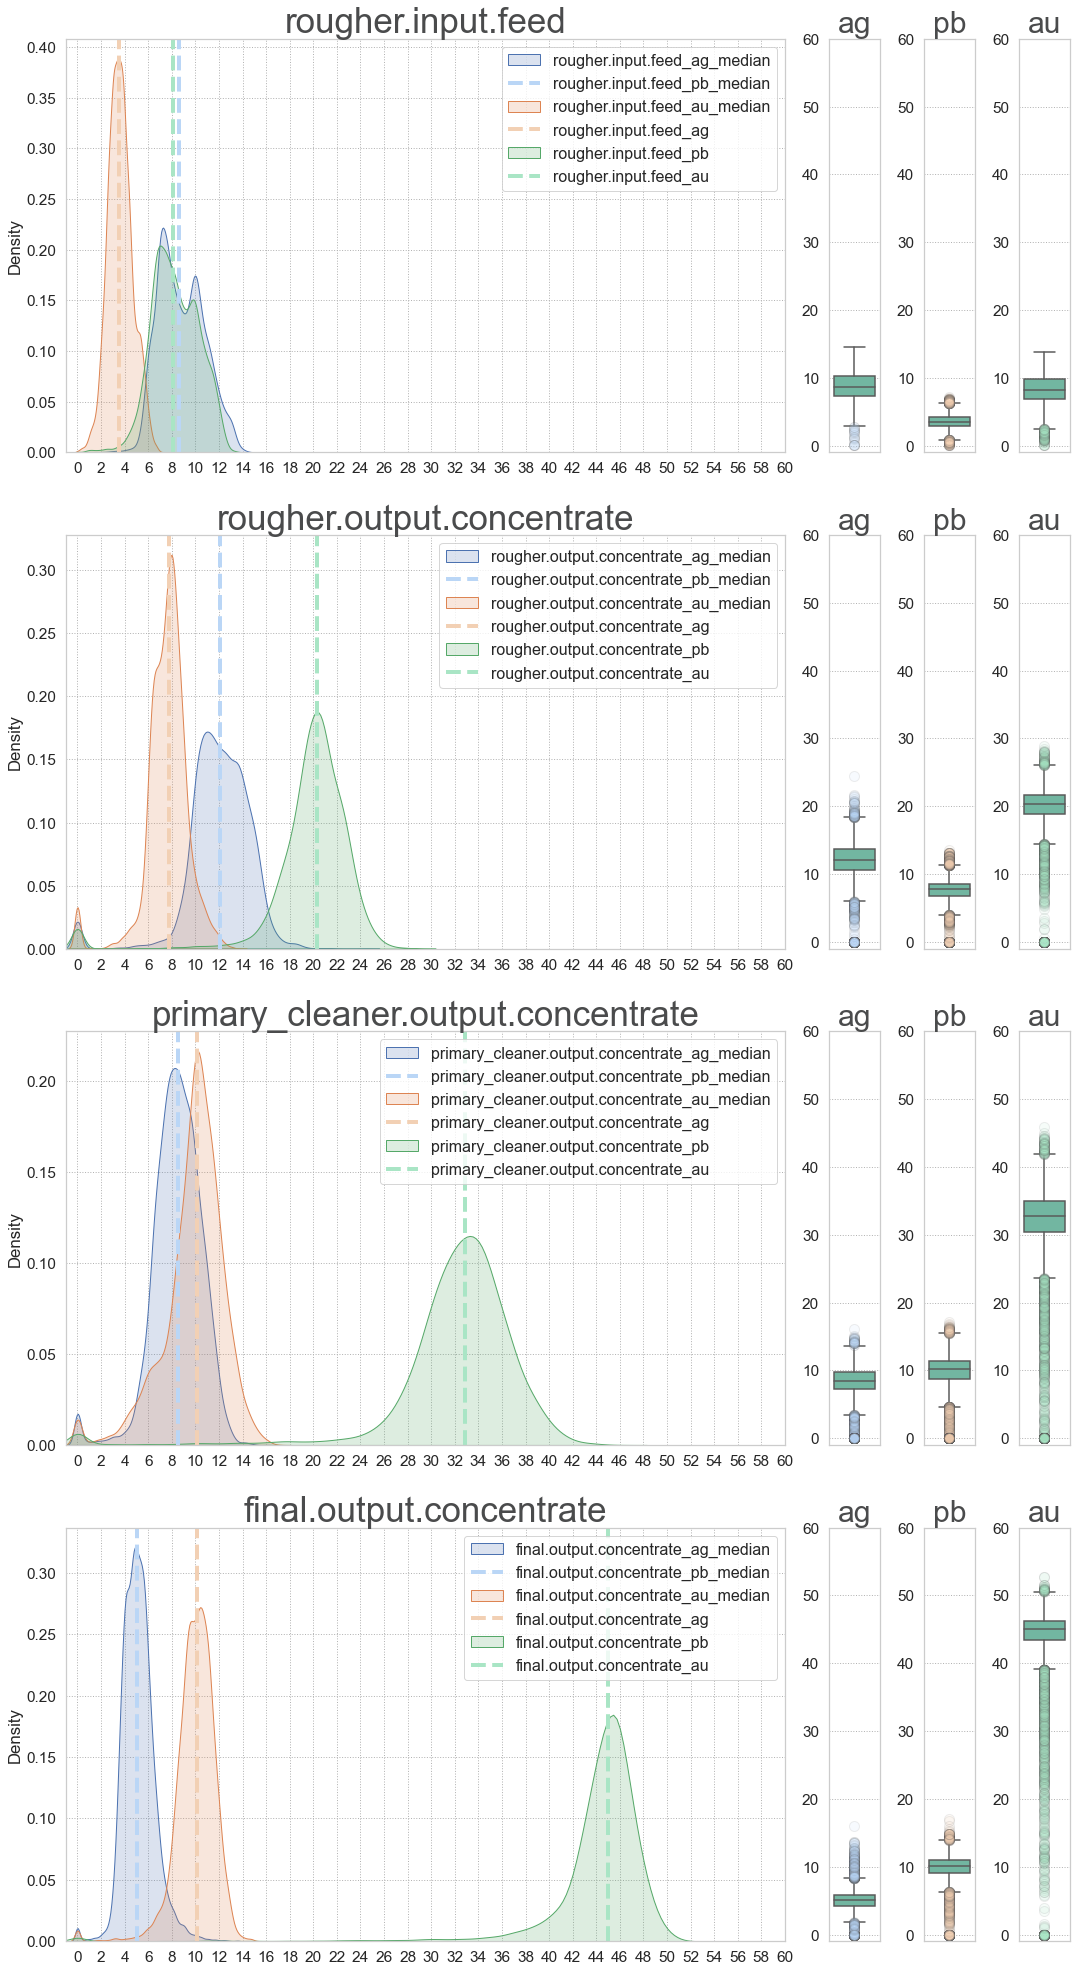

In [21]:
sns.set(font_scale=1.4, style={"grid.color": ".7", "grid.linestyle": ":"})  
fig, ax = plt.subplots(4, 4, figsize=(18, 35), gridspec_kw={'width_ratios': [14, 1, 1, 1], 'height_ratios': [1, 1, 1, 1]}) # сформируем фигуру из 4 элементов

stages = ['rougher.input.feed', 'rougher.output.concentrate', 'primary_cleaner.output.concentrate', 'final.output.concentrate']
colors = ['#bad6f6', '#f2d0b4', '#a9e5c5']

for st in range(len(stages)):
    
    metal_distribution = full_data[[col for col in full_data.columns if ((stages[st] in col) and ('_' in col[-3]))]]

    for col in range(len(metal_distribution.columns)):
        sns.kdeplot(data=metal_distribution, x=metal_distribution.iloc[:,col], shade=True, alpha=0.2, ax=ax[st, 0]) 
        ax[st, 0].axvline(x=metal_distribution.iloc[:,col].median(), ls='--', color=colors[col], linewidth=4)
    
    ax[st, 0].xaxis.set_major_locator(ticker.MultipleLocator(2)) # шаг по оси Х
    ax[st, 0].set_title(stages[st], color='#4a4b4c', fontsize=35) 
    ax[st, 0].set(xlabel=None)
    ax[st, 0].set_xlim([-1, 60])
    
    ax[st, 0].legend(
        labels=(metal_distribution.columns + '_median').append(metal_distribution.columns),
        loc='upper right',
        fontsize=16)

    for i in range(3):
        
        sns.boxplot(
            data=metal_distribution,
            y=metal_distribution.columns[i],
            palette='Set2',            
            flierprops=dict(marker='o', markersize=10, alpha=0.1, markerfacecolor=colors[i]),
            ax=ax[st, i+1]) # график размаха
        
        for cnt, box in enumerate(ax[st, i+1].artists):
            box.set_facecolor(colors[i])
        
        ax[st, i+1].set(ylabel=None)
        ax[st, i+1].set_ylim([-1, 60])
        ax[st, i+1].set_title(metal_distribution.columns[i][-2:], fontsize=30, color='#4a4b4c')

plt.subplots_adjust(hspace = 0.2)
plt.show()

<div style="display: flex; margin-left: 2px; tex-align:justify; opacity: 0.9">

<div style = "width: 100%; margin-left: 0px; margin-top: 15px; background: #ffffff; border: 1px solid #b0b1b2; border-radius: 2px 2px 2px 2px; margin-bottom:20px; color: #373738; font-size: 14px; padding-left: 10px; padding-right: 10px; padding-top: 15px; padding-bottom: 10px;font-family: Times New Roman; opacity: 0.9; tex-align:justify; box-shadow: 1px 1px 5px #c1c3c5">
    

$\hspace{1.0cm}$На основании визуализированных данных распределения концентрации металлов можно сделать следующие выводы:
- на этапе флотации ***`rougher`*** концентрация всех металлов имеет распределение со средними значениями в близком диапазоне, хотя концентрация золота немного превышает концентрацию остальных металлов
- на этапе первичной очистки ***`primary`*** значение среднего концентрации золота возрастает, тогда как среднее концентрации оcтальных металлов остается приблизительно в томже диапазоне
- на финальном этапе ***`fial`*** значение среднего концентрации золота значительно превышает, значения среднего концентрации других металлов, уровень которого так и остается приблизительно в одном диапазоне на всех этапах очистки.
    
$\hspace{1.0cm}$Визуализация распределения металлов явно показывает эффективность процедуры очистки по итогам прохождения всех этапов.
</div>
</div>
       


<h3 style="visibility: hidden; text-align: right">Распределения размеров гранул сырья</h3>
<div style = "width: 100%; color: #373738; font-size: 18px; font-family: Times New Roman; opacity: 0.8">
    


<p style="text-align: center; font-size: 20px; font-weight: bold">7.2. Распределения размеров гранул сырья
    

</div>
    


<div style="display: flex; margin-left: 2px; tex-align:justify; opacity: 0.9">

<div style = "width: 100%; margin-left: 0px; margin-top: 15px; background: #ffffff; border: 1px solid #b0b1b2; border-radius: 2px 2px 2px 2px; margin-bottom:20px; color: #373738; font-size: 14px; padding-left: 10px; padding-right: 10px; padding-top: 15px; padding-bottom: 10px;font-family: Times New Roman; opacity: 0.9; tex-align:justify; box-shadow: 1px 1px 5px #c1c3c5">
    


$\hspace{1.0cm}$Сравним распределения размеров гранул сырья ***`primary_cleaner.input.feed_size`*** на обучающей и тестовой выборкахб, в целях обеспечения корректности предсказаний модели.    
    
$\hspace{1.0cm}$Для чего, с помощью гистограмм и графиков размаха визуализируем размеров гранул сырья на обучающей и тестовой выборках.
</div>
</div>
    


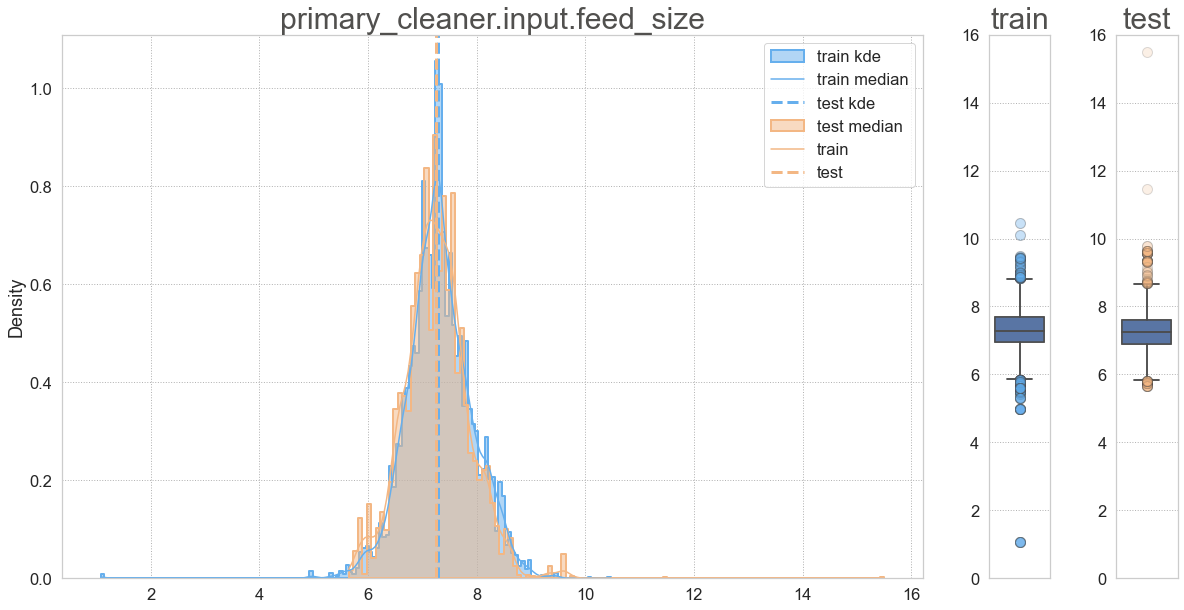

In [22]:
sns.set(font_scale=1.5, style={"grid.color": ".7", "grid.linestyle": ":"}) 
fig, ax = plt.subplots(1, 3, figsize=(20, 10), gridspec_kw={'width_ratios': [14, 1, 1]}) # сформируем фигуру из 4 элементов

train_test = [train_data, test_data]
colors = ['#66afed', '#f3b784', '#579573']
i = 0
for feed in train_test:
 
    sns.histplot(data=feed,
                x='primary_cleaner.input.feed_size',
                color=colors[i],
                element="step",
                stat='density',
                kde=True,
                alpha=0.5,
                linewidth=2,
                ax=ax[0],
                ) 
    ax[0].axvline(x=feed['primary_cleaner.input.feed_size'].median(), ls='--', color=colors[i], linewidth=3)
    ax[0].xaxis.set_major_locator(ticker.MultipleLocator(2)) # шаг по оси Х
    ax[0].set_title('primary_cleaner.input.feed_size', color='#51504e', fontsize=30) 
    ax[0].set(xlabel=None)
    ax[0].legend(labels=['train kde', 'train median', 'test kde', 'test median', 'train', 'test'])
    i += 1 

    for i in range(len(train_test)):
        
        sns.boxplot(data=train_test[i],
                    y='primary_cleaner.input.feed_size',
                    flierprops=dict(marker='o',
                                    markerfacecolor=colors[i],
                                    markersize=10,
                                    alpha=0.1
                                   ),
                    ax=ax[i+1])
        
        ax[i+1].set(ylabel=None)
        ax[i+1].set_ylim([0, 16])
        ax[i+1].set_title(['train', 'test'][i], color='#51504e', fontsize=30)
        for cnt, box in enumerate(ax[i+1].artists):
            box.set_facecolor(colors[i])
plt.show()

<div style="display: flex; margin-left: 2px; tex-align:justify; opacity: 0.9">

<div style = "width: 100%; margin-left: 0px; margin-top: 15px; background: #ffffff; border: 1px solid #b0b1b2; border-radius: 2px 2px 2px 2px; margin-bottom:20px; color: #373738; font-size: 14px; padding-left: 10px; padding-right: 10px; padding-top: 15px; padding-bottom: 10px;font-family: Times New Roman; opacity: 0.9; tex-align:justify; box-shadow: 1px 1px 5px #c1c3c5">
    


$\hspace{1.0cm}$Как мы видим, исходя из полученной визуализации, можем констатировать, что распределения размеров гранул сырья ***`primary_cleaner.input.feed_size`*** на обучающей и тестовой выборках, практически идентичны и по диапазонам значений и по среднему значению, а следовательно можем быть спокойны за корректность работы модели.
</div>
</div>
    



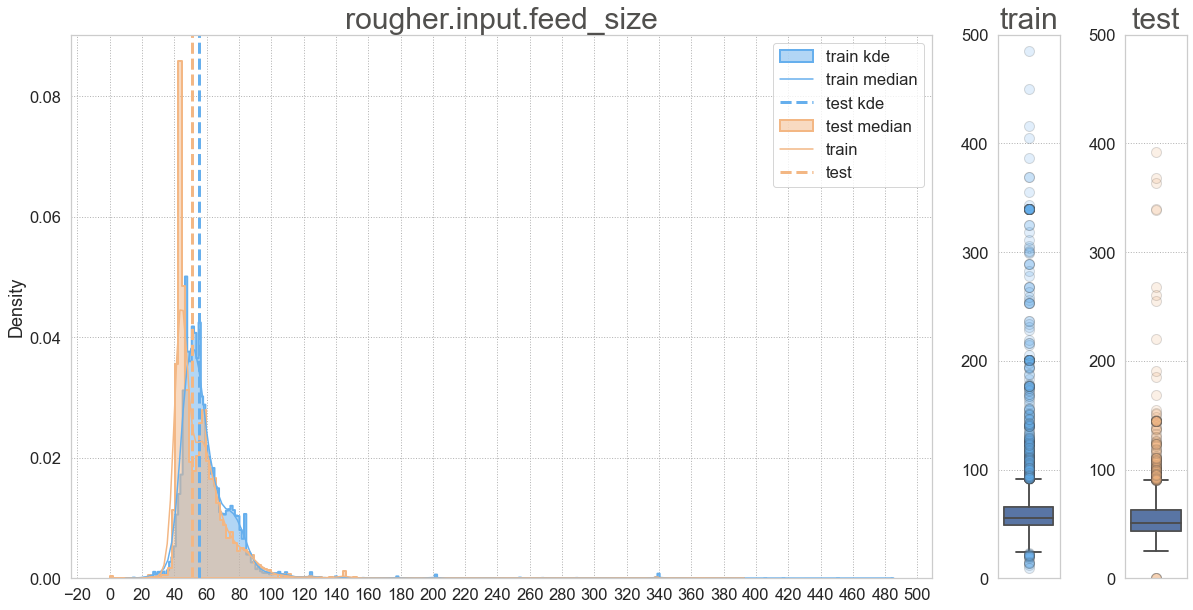

In [23]:
sns.set(font_scale=1.5, style={"grid.color": ".7", "grid.linestyle": ":"}) 
fig, ax = plt.subplots(1, 3, figsize=(20, 10), gridspec_kw={'width_ratios': [14, 1, 1]}) # сформируем фигуру из 4 элементов

train_test = [train_data, test_data]
colors = ['#66afed', '#f3b784', '#579573']
i = 0
for feed in train_test:
 
    sns.histplot(data=feed,
                x='rougher.input.feed_size',
                color=colors[i],
                element="step",
                stat='density',
                kde=True,
                alpha=0.5,
                linewidth=2,
                ax=ax[0],
                ) 
    ax[0].axvline(x=feed['rougher.input.feed_size'].median(), ls='--', color=colors[i], linewidth=3)
    ax[0].xaxis.set_major_locator(ticker.MultipleLocator(20)) # шаг по оси Х
    ax[0].set_title('rougher.input.feed_size', color='#51504e', fontsize=30) 
    ax[0].set(xlabel=None)
    ax[0].legend(labels=['train kde', 'train median', 'test kde', 'test median', 'train', 'test'])
    i += 1 

    for i in range(len(train_test)):
        
        sns.boxplot(data=train_test[i],
                    y='rougher.input.feed_size',
                    flierprops=dict(marker='o',
                                    markerfacecolor=colors[i],
                                    markersize=10,
                                    alpha=0.1
                                   ),
                    ax=ax[i+1])
        
        ax[i+1].set(ylabel=None)
        ax[i+1].set_ylim([0, 500])
        ax[i+1].set_title(['train', 'test'][i], color='#51504e', fontsize=30)
        for cnt, box in enumerate(ax[i+1].artists):
            box.set_facecolor(colors[i])
plt.show()

<div style="display: flex; margin-left: 2px; tex-align:justify; opacity: 0.9">

<div style = "width: 100%; margin-left: 0px; margin-top: 15px; background: #ffffff; border: 1px solid #b0b1b2; border-radius: 2px 2px 2px 2px; margin-bottom:20px; color: #373738; font-size: 14px; padding-left: 10px; padding-right: 10px; padding-top: 15px; padding-bottom: 10px;font-family: Times New Roman; opacity: 0.9; tex-align:justify; box-shadow: 1px 1px 5px #c1c3c5">
    


$\hspace{1.0cm}$Исходя из полученной визуализации, можем констатировать, что распределения размеров гранул сырья ***`rougher.input.feed_size`*** на обучающей и тестовой выборках, также практически идентичны и по диапазонам значений и по среднему значению.
</div>
</div>
    



<h3 style="visibility: hidden; text-align: right">Суммарная концентрация веществ</h3>
<div style = "width: 100%; color: #373738; font-size: 18px; font-family: Times New Roman; opacity: 0.8">
    


<p style="text-align: center; font-size: 20px; font-weight: bold">7.3. Суммарная концентрация веществ
    

</div>

<div style="display: flex; margin-left: 2px; tex-align:justify; opacity: 0.9">

<div style = "width: 100%; margin-left: 0px; margin-top: 15px; background: #ffffff; border: 1px solid #b0b1b2; border-radius: 2px 2px 2px 2px; margin-bottom:20px; color: #373738; font-size: 14px; padding-left: 10px; padding-right: 10px; padding-top: 15px; padding-bottom: 10px;font-family: Times New Roman; opacity: 0.9; tex-align:justify; box-shadow: 1px 1px 5px #c1c3c5">
    

$\hspace{1.0cm}$Проанализируем суммарную концентрацию всех веществ ***`output.concentrate`***  на разных стадиях: в сырье, в черновом и финальном концентратах.

    
    
$\hspace{1.0cm}$Для чего, с помощью гистограмм и графиков размаха визуализируем суммарную концентрацию всех веществ на разных стадиях очистки:
- ***`rougher`*** - в сырье rougher.output.concentrate
- ***`primary`*** - в черновом primary_cleaner.output.concentrate
- ***`final`*** - в финальном final.output.concentrate
</div>
</div>
    


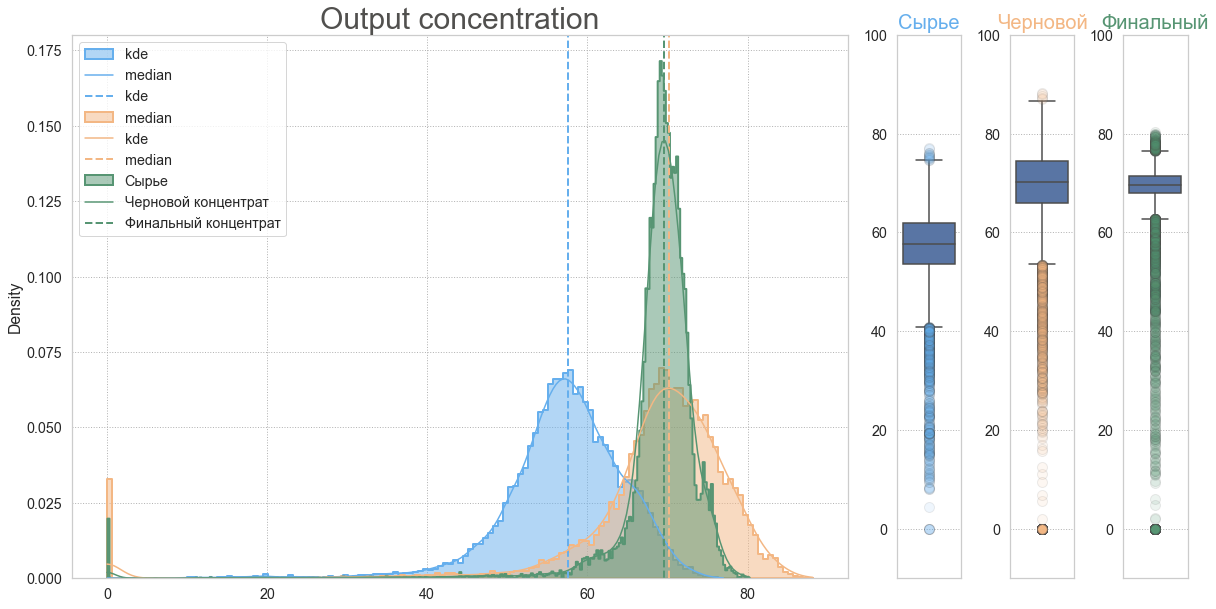

In [24]:
def full_concentrate_graf(full_data):   
    sns.set(font_scale=1.3, style={"grid.color": ".7", "grid.linestyle": ":"}) 
    fig, ax = plt.subplots(1, 4, figsize=(20, 10), gridspec_kw={'width_ratios': [12, 1, 1,1]})
    colors = ['#66afed', '#f3b784', '#579573']
    stages = ['rougher.input.feed', 'rougher.output.concentrate', 'final.output.concentrate']
    for st in range(len(stages)):

        total_concentration = full_data[
            [
                col for col in full_data.columns if ((stages[st] in col) and
                                                  ('_rate'  not in col) and
                                                  ('_size'  not in col)
                                                 )
            ]
        ]
        total_concentration = total_concentration.loc[:, :].sum(axis=1)

        sns.histplot(data=total_concentration,
                     x=total_concentration.values,
                     kde=True,
                     element="step",
                     stat='density',
                     linewidth=2,
                     alpha=0.5,
                     color=colors[st],
                     ax=ax[0])
    #     ax[0].set_xlim([-1, 15])
        ax[0].set_title('Output concentration', color='#51504e', fontsize=30)
        ax[0].axvline(x=np.median(total_concentration.values), ls='--', color=colors[st], linewidth=2)
        ax[0].legend(labels=['kde',
                             'median',
                             'kde',
                             'median',
                             'kde',
                             'median',
                             'Сырье',
                             'Черновой концентрат',
                             'Финальный концентрат'
                            ]),

        sns.boxplot(data=total_concentration,
                        y=total_concentration.values,
                        flierprops=dict(marker='o',
                                        markerfacecolor=colors[st],
                                        markersize=10,
                                        alpha=0.1
                                       ),
                        ax=ax[st+1])
        ax[st+1].set(ylabel=None)
        ax[st+1].set_ylim([-10, 100])
        ax[st+1].set_title(['Сырье', 'Черновой', 'Финальный'][st], color=colors[st], fontsize=20)
        for cnt, box in enumerate(ax[st+1].artists):
            box.set_facecolor(colors[st])
full_concentrate_graf(full_data)

<div style="display: flex; margin-left: 2px; tex-align:justify; opacity: 0.9">

<div style = "width: 100%; margin-left: 0px; margin-top: 15px; background: #ffffff; border: 1px solid #b0b1b2; border-radius: 2px 2px 2px 2px; margin-bottom:20px; color: #373738; font-size: 14px; padding-left: 10px; padding-right: 10px; padding-top: 15px; padding-bottom: 10px;font-family: Times New Roman; opacity: 0.9; tex-align:justify; box-shadow: 1px 1px 5px #c1c3c5">
    

    
$\hspace{1.0cm}$В массиве значений концентрации металлов в сырье, черновом и финальном концентратах, наблюдается ***`большое количество выбросов`*** с плотностью распределения близкой к нулю. Общий порог выбросов для всех концентраций наблюдается на уровне ***`40`*** единиц. Исключим эти выбросы для анализа суммарной концентрации металлов, а также по аналогичным порогам значений для обучающей выборки, вцелях обеспечения более корректных предсказаний моделей.
</div>
</div>


In [25]:
full_data = full_data.loc[(full_data['rougher.input.feed_ag'] + 
                           full_data['rougher.input.feed_au'] +
                           full_data['rougher.input.feed_pb'] +
                           full_data['rougher.input.feed_sol']
                          ) > 40.0]

full_data = full_data.loc[(full_data['rougher.output.concentrate_ag'] + 
                           full_data['rougher.output.concentrate_au'] +
                           full_data['rougher.output.concentrate_pb'] +
                           full_data['rougher.output.concentrate_sol']
                          ) > 40.0]

full_data = full_data.loc[(full_data['final.output.concentrate_ag'] + 
                           full_data['final.output.concentrate_au'] +
                           full_data['final.output.concentrate_pb'] +
                           full_data['final.output.concentrate_sol']
                          ) > 40.0]
train_data = train_data.loc[(train_data['rougher.input.feed_ag'] + 
                           train_data['rougher.input.feed_au'] +
                           train_data['rougher.input.feed_pb'] +
                           train_data['rougher.input.feed_sol']
                          ) > 40.0]

<div style="display: flex; margin-left: 2px; tex-align:justify; opacity: 0.9">

<div style = "width: 100%; margin-left: 0px; margin-top: 15px; background: #ffffff; border: 1px solid #b0b1b2; border-radius: 2px 2px 2px 2px; margin-bottom:20px; color: #373738; font-size: 14px; padding-left: 10px; padding-right: 10px; padding-top: 15px; padding-bottom: 10px;font-family: Times New Roman; opacity: 0.9; tex-align:justify; box-shadow: 1px 1px 5px #c1c3c5">
    

$\hspace{1.0cm}$Переформируем график визуализации показателей 
</div>
</div>
    

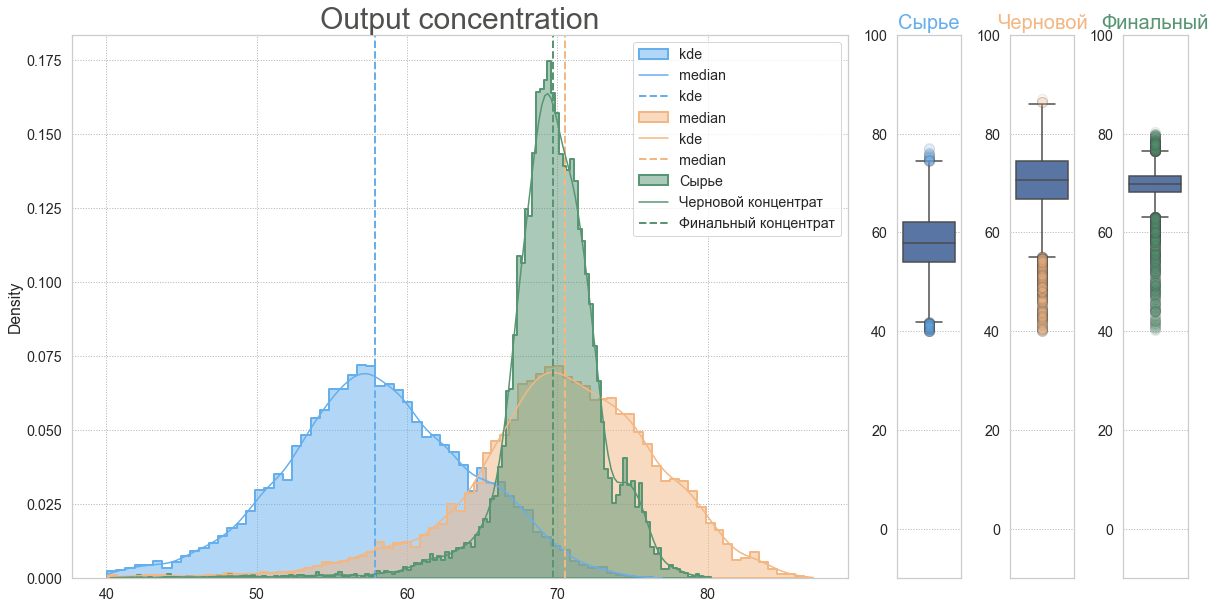

In [26]:
full_concentrate_graf(full_data)

<div style="display: flex; margin-left: 2px; tex-align:justify; opacity: 0.9">

<div style = "width: 100%; margin-left: 0px; margin-top: 15px; background: #ffffff; border: 1px solid #b0b1b2; border-radius: 2px 2px 2px 2px; margin-bottom:20px; color: #373738; font-size: 14px; padding-left: 10px; padding-right: 10px; padding-top: 15px; padding-bottom: 10px;font-family: Times New Roman; opacity: 0.9; tex-align:justify; box-shadow: 1px 1px 5px #c1c3c5">
    


$\hspace{1.0cm}$По итогам анализа суммарной концентрации всех веществ можно сделать следующие выводы:
- концентрация металлов в сырье имеет соответственно более низкое среднее и более широкий диапазон распределения показателей, что вполне объяснимо для необработанного концентрата
- черновой концентрат и финальная концентрация, при одинаковом среднем, вполне закономерно различаются плотностью распределения в области средних значений, финальный концентрат имеет более плотный диапазон значений.
    
    
$\hspace{1.0cm}$Опять же это отражает положительные рультаты всей процедуры очисти, по завершении которой получается более насыщенный металлами концентрат.
</div>
</div>
    



<h2 style="visibility: hidden; text-align: right">Построение моделей</h2>
<div style = "width: 100%; color: #373738; font-size: 18px; font-family: Times New Roman; opacity: 0.8">
    


<p style="text-align: center; font-size: 25px; font-weight: bold">8. Построение моделей
    

</div>



<h3 style="visibility: hidden; text-align: right">Функция вычисления целевой метрики (sMAPE)</h3>
<div style = "width: 100%; color: #373738; font-size: 18px; font-family: Times New Roman; opacity: 0.8">
    


<p style="text-align: center; font-size: 20px; font-weight: bold">8.1. Функция вычисления целевой метрики (sMAPE)
    

</div>



<div style="display: flex; margin-left: 2px; tex-align:justify; opacity: 0.9">

<div style = "width: 100%; margin-left: 0px; margin-top: 15px; background: #ffffff; border: 1px solid #b0b1b2; border-radius: 2px 2px 2px 2px; margin-bottom:20px; color: #373738; font-size: 14px; padding-left: 10px; padding-right: 10px; padding-top: 15px; padding-bottom: 10px;font-family: Times New Roman; opacity: 0.9; tex-align:justify; box-shadow: 1px 1px 5px #c1c3c5">
    


$\hspace{1.0cm}$Для решения задачи введём новую метрику качества — ***`sMAPE`*** (англ. Symmetric Mean Absolute Percentage Error, «симметричное среднее абсолютное процентное отклонение»).
    
    
    
    
***`sMAPE`*** рассчитывается по формуле:
    
</div>
</div>
    

    
    
<div align="center" style = "padding:15px"><div align="center" style = "width:42%; padding:10px; background-color: #ececec; box-shadow:1px 1px 2px 2px #b2b2b2; border-radius: 1px 10px"><font padding=""  style="color:#7c7c7d; font-size:16px; text-shadow: 1px 1px 3px #d1d2d3">
    
$sMAPE= \frac{1}{N} \sum_{i=1}^{N} \frac {|y_i-\hat{y_i}|}{(|y_i|+|\hat{y_i}|)/2} \times 100\% $
</div>        
</div>

    
    
    
    
    
    
<div align="center" style = "padding:15px"><div align="center" style = "width:75%; padding:10px; background-color: #ececec; box-shadow:1px 1px 2px 2px #b2b2b2; border-radius: 1px 10px"><font padding=""  style="color:#7c7c7d; font-size:16px; text-shadow: 1px 1px 3px #d1d2d3">    
    
    
    

$\hspace{0.1cm}sMAPE^{Итоговое} = 25\% \times sMAPE^{(rougher)} + 75\% \times sMAPE^{(final)}$  
</div>
    
    
<div style="display: flex; margin-left: 2px; tex-align:justify; opacity: 0.9">

<div style = "width: 100%; margin-left: 0px; margin-top: 15px; background: #ffffff; border: 1px solid #b0b1b2; border-radius: 2px 2px 2px 2px; margin-bottom:20px; color: #373738; font-size: 14px; padding-left: 10px; padding-right: 10px; padding-top: 15px; padding-bottom: 10px;font-family: Times New Roman; opacity: 0.9; tex-align:justify; box-shadow: 1px 1px 5px #c1c3c5">
    


$\hspace{1.0cm}$Для решения задачи введём новую метрику качества — ***`sMAPE`*** (англ. Symmetric Mean Absolute Percentage Error, «симметричное среднее абсолютное процентное отклонение»).
    
    
    
где:<br>    
${y_i}$ - значение целевого признака для объекта с порядковым номером i в выборке, на которой измеряется качество<br>   
$\hat{y_i}$ - значение предсказания для объекта с порядковым номером i, например, в тестовой выборке<br> 
$N$ - количество объектов в выборке<br>
$\sum_{i=1}^{N}$ - суммирование по всем объектам выборки (i меняется от 1 до N)<br>

Реализуем функцию ***`smape_metric`***, которая на вход будет принимать пары признаков:
> целевые признаки $target_{\hspace{0.1cm}rougher.output.recovery}^{\hspace{0.1cm}final.output.recovery}$<br>

> предсказанные значения $predictions_{\hspace{0.1cm}rougher.output.recovery}^{\hspace{0.1cm}final.output.recovery}$<br>

    
    
    
и на основе приведенных выше формул возвращать $\hspace{0.1cm}sMAPE^{Итоговое}$
    
</div>
</div>    


In [27]:
def smape_metric(target, predictions):
    smp = []
    predictions = pd.DataFrame(predictions)
    for i in range(2):
        
        smp.append(
            np.sum(
                abs(target.iloc[:, i].values - predictions.iloc[:, i].values) /
                ((abs(target.iloc[:, i].values) + abs(predictions.iloc[:, i].values) + 0.0000000000001) / 2)
            ) / len(target.iloc[:, i].values) * 100
        )

    total_smape = 0.25 * smp[0] + 0.75 * smp[1]
    
    return total_smape
# Создание параметра метрики для кроссвалидации
smape_score = make_scorer(smape_metric)

<h3 style="visibility: hidden; text-align: right">Разделение данных</h3>
<div style = "width: 100%; color: #373738; font-size: 18px; font-family: Times New Roman; opacity: 0.8">
    


<p style="text-align: center; font-size: 20px; font-weight: bold">8.2. Разделение данных
    

</div>


<div style="display: flex; margin-left: 2px; tex-align:justify; opacity: 0.9">

<div style = "width: 100%; margin-left: 0px; margin-top: 15px; background: #ffffff; border: 1px solid #b0b1b2; border-radius: 2px 2px 2px 2px; margin-bottom:20px; color: #373738; font-size: 14px; padding-left: 10px; padding-right: 10px; padding-top: 15px; padding-bottom: 10px;font-family: Times New Roman; opacity: 0.9; tex-align:justify; box-shadow: 1px 1px 5px #c1c3c5">
    


$\hspace{1.0cm}$Разделим обучающую выборку на массив обучающих данных ***`features_train`*** и массив целевых признаков ***`target_train`*** и проверим сформированные данные выводом головной части массивов.
    
</div>
</div>    
    


In [28]:
features_train = train_data.drop(['date', 'rougher.output.recovery', 'final.output.recovery'],axis=1)
target_train = train_data[['rougher.output.recovery', 'final.output.recovery']]

In [29]:
features_train.head()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,127.092003,10.128295,7.25,0.988759,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,125.629232,10.296251,7.25,1.002663,1576.166671,-500.904965,1575.950626,-499.865889,1575.994189,-499.315107,1574.479259,-498.931665,6.161113,2.266033,525.290581,57.278666,35.753385,6.478583,11.971193,6.005766,11.996163,6.012594,1000.286398,-400.065196,1600.754587,-449.953435,1600.479580,-449.830646,1600.527589,-449.953649,1399.227084,-450.869848,1399.719514,-450.119001,25.880539,-499.989656,23.889530,-500.372428,23.970550,-500.085473,22.085714,-499.446897,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,123.819808,11.316280,7.25,0.991265,1601.556163,-499.997791,1600.386685,-500.607762,1602.003542,-500.870069,1599.541515,-499.827444,6.116455,2.159622,530.026610,57.510649,35.971630,6.362222,11.920603,6.197377,11.920305,6.204633,999.719565,-400.074028,1599.337330,-450.008530,1599.672797,-449.954491,1599.849325,-449.954185,1399.180945,-449.937588,1400.316682,-450.527147,26.005245,-499.929616,23.886657,-499.951928,23.913535,-499.442343,23.957717,-499.901982,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,122.270188,11.322140,7.25,0.996739,1599.968720,-500.951778,1600.659236,-499.677094,1600.304144,-500.727997,1600.449520,-500.052575,6.043309,2.037807,542.590390,57.792734,36.862241,6.118189,11.630094,6.203177,11.692450,6.196578,999.814770,-400.200179,1600.059442,-450.619948,1600.012842,-449.910497,1597.725177,-450.130127,1400.943157,-450.030142,1400.234743,-449.790835,25.942508,-499.176749,23.955516,-499.848796,23.

In [30]:
target_train.head()

,rougher.output.recovery,final.output.recovery
0,87.107763,70.541216
1,86.843261,69.266198
2,86.842308,68.116445
3,87.226430,68.347543
4,86.688794,66.927016


<div style="display: flex; margin-left: 2px; tex-align:justify; opacity: 0.9">

<div style = "width: 100%; margin-left: 0px; margin-top: 15px; background: #ffffff; border: 1px solid #b0b1b2; border-radius: 2px 2px 2px 2px; margin-bottom:20px; color: #373738; font-size: 14px; padding-left: 10px; padding-right: 10px; padding-top: 15px; padding-bottom: 10px;font-family: Times New Roman; opacity: 0.9; tex-align:justify; box-shadow: 1px 1px 5px #c1c3c5">
    


$\hspace{1.0cm}$Проделаем тоже самое для тестовой выборки.
</div>
</div>    
    



In [31]:
features_test = test_data.drop(['date', 'rougher.output.recovery', 'final.output.recovery'],axis=1)
target_test = test_data[['rougher.output.recovery', 'final.output.recovery']]

In [32]:
features_test.head()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,1399.001695,-499.485144,13.128569,5.636710,489.793655,62.710452,42.022440,12.084103,16.922877,6.153479,16.867518,6.150709,1001.849317,-350.301265,1249.738612,-399.107531,1249.750520,-399.396730,1198.287855,-399.488594,999.472250,-399.530962,949.566189,-398.180807,24.938200,-500.490963,14.947607,-500.013837,20.018166,-450.395995,13.987058,-449.831513,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,1399.508091,-500.416324,13.036280,5.526065,490.104534,61.961163,41.187903,11.918977,17.002532,5.999043,16.996063,6.002315,998.690785,-350.425704,1248.395457,-399.946025,1249.514451,-399.630810,1200.506459,-399.942434,1000.002114,-399.491528,950.200009,-405.787514,24.923466,-499.813963,14.930873,-500.764452,19.988503,-450.114024,14.092981,-450.059163,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,1399.497088,-499.715479,13.138412,5.426561,489.617969,66.903807,42.546294,12.091332,16.992520,5.850632,16.982096,5.853594,998.516720,-349.783538,1247.440748,-400.264330,1248.207204,-401.074405,1199.770026,-400.790582,999.925519,-399.236999,950.320481,-400.864340,24.908732,-500.304035,14.996511,-500.993821,20.039689,-450.263164,14.077881,-449.660997,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,1401.065165,-501.038738,12.400507,5.114758,476.618130,59.865919,41.060195,12.181597,16.532144,5.801935,16.515277,5.803657,1000.276604,-350.172597,1251.322675,-398.655289,1250.493702,-399.746728,1199.398691,-397.503052,1001.930679,-400.437573,950.735324,-399.802986,24.893998,-499.382374,14.916674,-

In [33]:
target_test.head()

,rougher.output.recovery,final.output.recovery
0,89.993421,70.273583
1,88.089657,68.910432
2,88.412756,68.143213
3,87.360133,67.776393
4,83.236367,61.467078


<h3 style="visibility: hidden; text-align: right">Масштабирование данных </h3>
<div style = "width: 100%; color: #373738; font-size: 18px; font-family: Times New Roman; opacity: 0.8">
    


<p style="text-align: center; font-size: 20px; font-weight: bold">8.3. Масштабирование данных 
    

</div>



<div style="display: flex; margin-left: 2px; tex-align:justify; opacity: 0.9">

<div style = "width: 100%; margin-left: 0px; margin-top: 15px; background: #ffffff; border: 1px solid #b0b1b2; border-radius: 2px 2px 2px 2px; margin-bottom:20px; color: #373738; font-size: 14px; padding-left: 10px; padding-right: 10px; padding-top: 15px; padding-bottom: 10px;font-family: Times New Roman; opacity: 0.9; tex-align:justify; box-shadow: 1px 1px 5px #c1c3c5">
    
$\hspace{1.0cm}$С помощью алгоритма  ***`StandardScaler`*** библиотеки ***`sklearn`*** произведем масштабирование.

    
    
    
$\hspace{1.0cm}$По завершении процедуры отобразим описательную статистику масштабированного массива и убедимся в том, достигнуты цели масштабирования.
    
</div>
</div>  

In [34]:
scaler = StandardScaler()
scaler.fit(features_train[features_train.columns])
features_train[features_train.columns] = scaler.transform(features_train[features_train.columns])
features_test[features_test.columns] = scaler.transform(features_test[features_test.columns])

In [35]:
features_train.describe().iloc[[3, 7]]

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
min,-3.463401,-2.650209,-10.235691,-2.373262,-12.587861,-8.741346,-12.316353,-7.532396,-12.111502,-8.785550,-5.588590,-6.759645,-2.774747,-3.195845,-4.757115,-2.366647,-4.545108,-3.874074,-3.636435,-5.518735,-3.055291,-4.832249,-6.643436,-3.002524,-7.219370,-3.250737,-6.079783,-3.156275,-5.760748,-3.149248,-5.850596,-3.269151,-5.953735,-3.276561,-5.094323,-4.973129,-4.143658,-4.724481,-5.200738,-5.872745,-4.535957,-6.465985,-3.535759,-6.375163,-2.950244,-5.793901,-2.946501,-8.315116,-2.158300,-8.116597,-3.354607,-8.153012
max,2.983488,3.315157,5.148715,4.357328,3.687936,4.480366,3.871536,4.262946,3.040182,4.053352,3.093708,9.685360,3.201986,3.347138,2.392918,19.976995,2.825290,2.760338,7.476153,3.584650,7.079983,3.201772,2.334658,0.934927,2.679689,2.948521,5.626887,3.116158,2.902762,4.642006,4.536957,3.428297,3.864376,4.844874,3.944673,6.264372,1.699283,4.652335,2.653442,5.244302,2.477671,7.895732,1.782748,4.636428,1.610290,5.382720,4.605302,5.555362,2.563805,8.400011,2.179639,10.853654


In [36]:
features_test.describe().iloc[[3, 7]]

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
min,-3.397340,-2.649067,-2.748286,-2.359926,-12.587910,-8.647502,-12.316420,-9.330519,-12.111616,-8.790013,-5.588621,-6.759766,-4.331033,-3.024132,-4.757213,-2.818552,-8.562791,-3.904505,-3.636578,-5.519541,-3.055297,-4.826703,-6.643442,-3.085152,-7.219745,-3.250478,-6.079883,-3.274028,-5.762835,-3.291154,-5.850660,-3.266020,-5.954671,-3.277772,-5.072346,-4.713570,-4.142651,-4.691143,-5.200738,-5.875357,-4.535957,-7.667651,-3.535759,-6.376939,-2.950244,-5.810079,-2.870904,-8.319938,-2.178747,-8.122101,-3.402134,-8.162254
max,3.392154,9.249433,13.389776,8.614523,3.872428,12.182950,1.561316,10.414180,0.796546,9.598506,1.336010,6.941299,3.100009,3.127392,2.291822,15.629932,4.065347,3.081594,3.833879,2.840599,3.424164,2.309516,1.752413,1.012395,2.118766,2.916691,2.028874,3.010407,2.702680,7.020427,2.078777,5.779702,2.544449,3.815297,0.417942,3.379124,0.538036,4.653378,1.904859,3.009906,1.871057,6.876646,1.771456,1.531844,2.989738,7.747772,1.444398,6.368074,0.168264,8.905218,1.231188,10.344631


<h3 style="visibility: hidden; text-align: right">Обучение моделей и подбор гиперпараметров </h3>
<div style = "width: 100%; color: #373738; font-size: 18px; font-family: Times New Roman; opacity: 0.8">
    


<p style="text-align: center; font-size: 20px; font-weight: bold">8.4. Обучение моделей и подбор гиперпараметров  
    

</div>



<div style="display: flex; margin-left: 2px; tex-align:justify; opacity: 0.9">

<div style = "width: 100%; margin-left: 0px; margin-top: 15px; background: #ffffff; border: 1px solid #b0b1b2; border-radius: 2px 2px 2px 2px; margin-bottom:20px; color: #373738; font-size: 14px; padding-left: 10px; padding-right: 10px; padding-top: 15px; padding-bottom: 10px;font-family: Times New Roman; opacity: 0.9; tex-align:justify; box-shadow: 1px 1px 5px #c1c3c5">
    

$\hspace{1.0cm}$Произведем обучение и настройку следующих моделей:
- LinearRegression
- RandomForestRegressor
- Lars
- LassoLars
- MultiTaskElasticNet
- Ridge
- ElasticNet
- Lasso
    
$\hspace{1.0cm}$Обучение моделей проконтролируем с помощью метода кроссвалидации ***`cross_val_score`***, в качестве метрики оценки точности моделей будем использовать сформированную функцию метрики ***`smape_metric`***.
    
    
 
$\hspace{1.0cm}$Для ее использования в качестве параметра кроссвалидации с помощью функции  ***`make_scorer`*** зададим данный параметр   
    
</div>
</div>  
    


<div style="display: flex; margin-left: 2px; tex-align:justify; opacity: 0.9">

<div style = "width: 100%; margin-left: 0px; margin-top: 15px; background: #ffffff; border: 1px solid #b0b1b2; border-radius: 2px 2px 2px 2px; margin-bottom:20px; color: #373738; font-size: 14px; padding-left: 10px; padding-right: 10px; padding-top: 15px; padding-bottom: 10px;font-family: Times New Roman; opacity: 0.9; tex-align:justify; box-shadow: 1px 1px 5px #c1c3c5">
    

    

$\hspace{1.0cm}$Подбор гиперпараметров моделей осуществи м с помощью библиотеки ***`Optuna`***, по следующим этапам:
- сформируем список ***`tuned_models`*** для хранения обученных моделей, с лучшими показателями точности по итогам кроссвалидации
- сформируем список ***`sMAPE`*** для хранения показателя точности целевой метрики после настройки модели
- сформируем список ***`models`***, в котором будет заложен перечень моделей и диапазон подбираемых гиперпараметров
- с помощью цикла переберем модели списка ***`models`***, и с помощью функции ***`mod_run`*** передадим их вместе с диапазоном параметров для подбора оптимизатору ***`Optuna`***
- результаны обучения сформируем ввиде итогового датафрейма, отсортированного по наилучшим результатам точности
 
</div>
</div>  
    


In [37]:
tuned_models = []
sMAPE = []

# Зададим список моделей с параметрам
models = [
   
    [LinearRegression(),{}],
    
    [DecisionTreeRegressor(), {'max_depth': list(range(1, 60)),
                               'min_samples_split': list(range(2, 60)),
                               'min_samples_leaf': list(range(1, 60)),
                               'min_weight_fraction_leaf': list(np.arange(0.1, 0.2, 0.001)),
                               'min_impurity_decrease': list(np.arange(0.0000026, 0.0000027, 0.0000000001)),
                               'random_state': [1]}],
    
    [ElasticNet(), {'alpha': list(np.arange(0.69, 0.7, 0.001)),
                    'tol': list(np.arange(0.071, 0.072, 0.0001)),
                    'max_iter': list(range(4000, 4100)),
                    'l1_ratio': list(np.arange(0.099, 0.1, 0.0001)),
                    'random_state': [1]}],
    
    [Lars(), {'n_nonzero_coefs': list(range(8, 20)),
              'normalize': [False],
              'random_state': [1]}],
   
    [LassoLars(), {'alpha': list(np.arange(0.1, 1, 0.001)),
                   'normalize': [False],
                   'max_iter': list(range(90, 150)),
                   'random_state': [1]}],
    
     [Lasso(), {'alpha': list(np.arange(0.683186088774553, 0.683186088774554, 1e-16)),
                'max_iter': list(range(100, 150)),
                'random_state': [1]}],
    
    
    [RandomForestRegressor(), {'max_depth': list(range(1, 20)),
                               'n_estimators': list(range(1, 20)),
                               'random_state': [1]}],
    
    [Ridge(), {'alpha': list(np.arange(10004.49999, 10004.5, 0.00001)),
               'tol': list(np.arange(0.16, 0.18, 0.01)),
               'random_state': [1]}],
    
    
    [MultiTaskElasticNet(),
     {'alpha': list(np.arange(0.8, 0.83, 0.01)), 
      'tol': list(np.arange(0.16, 0.18, 0.01)),
      'random_state': [1]}]

]

# Обучение , подбор параметров и кросвалидая
for i in range(len(models)):
    model = models[i][0]
    def mod_run(trial):
        global model_name  
        model = models[i][0]
        dict = {}
        
        # формирование словаря гиперпараметров 
        for param, vals in models[i][1].items():
            dict[param] =  trial.suggest_categorical(param, vals)
        params = dict
        
        # формирование имени переменной хранения модели и имени показателей точности
        model_name = str(locals()['model']).split('(')[0] + '_model'
        score_name = str(locals()['model']).split('(')[0] + '_smape_score'
        
        # обучение модели и кроссвалидация
        locals()[model_name] = model.set_params(**params)
        locals()[model_name].fit(features_train, target_train)
        scval = cross_val_score(locals()[model_name], features_train, target_train, cv=4, scoring=smape_score)   
        
        return scval.mean()
    
    # Подбор гиперпараметров
    cb_study = optuna.create_study(direction="minimize")
    cb_study.optimize(mod_run, n_trials=40, timeout=40)
    print(model_name, cb_study.best_params, cb_study.best_value)
    
    # Заполнение списков обученных моделей и метрик точности
    tuned_models.append(model.set_params(**cb_study.best_params))
    sMAPE.append(cb_study.best_value)

clear_output(wait=False)

# Формирование итогового датафрейма
(pd.DataFrame(
    sMAPE,
    index=tuned_models,
    columns=['Итоговое sMAPE'])
 .sort_values('Итоговое sMAPE')
 .style.background_gradient(axis=0, cmap='YlGn')
)

,Итоговое sMAPE
"MultiTaskElasticNet(alpha=0.8, random_state=1, tol=0.16)",10.145520
"LassoLars(alpha=0.5900000000000004, max_iter=114, normalize=False, random_state=1)",10.164675
"ElasticNet(alpha=0.69, l1_ratio=0.09990000000000003, max_iter=4018, random_state=1, tol=0.07200000000000002)",10.170234
"Lasso(alpha=0.6831860887745531, max_iter=104, random_state=1)",10.178647
"Lars(n_nonzero_coefs=9, normalize=False, random_state=1)",10.204856
"Ridge(alpha=10004.49999, random_state=1, tol=0.17)",10.205325
"DecisionTreeRegressor(max_depth=52, min_impurity_decrease=2.630499999999938e-06, min_samples_leaf=2, min_samples_split=26, min_weight_fraction_leaf=0.10300000000000001, random_state=1)",10.651520
"RandomForestRegressor(max_depth=4, n_estimators=10, random_state=1)",10.880866
LinearRegression(),11.925693


<div style="display: flex; margin-left: 2px; tex-align:justify; opacity: 0.9">

<div style = "width: 100%; margin-left: 0px; margin-top: 15px; background: #ffffff; border: 1px solid #b0b1b2; border-radius: 2px 2px 2px 2px; margin-bottom:20px; color: #373738; font-size: 14px; padding-left: 10px; padding-right: 10px; padding-top: 15px; padding-bottom: 10px;font-family: Times New Roman; opacity: 0.9; tex-align:justify; box-shadow: 1px 1px 5px #c1c3c5">
    

    

$\hspace{1.0cm}$По итогам обучения и проверки точности моделей получили следующий рейтинг точности моделей по целевому критерию ***`sMAPE`***
 
</div>
</div>  


<h2 style="visibility: hidden; text-align: right">Проверка моделей на тестовой выборке</h2>
<div style = "width: 100%; color: #373738; font-size: 18px; font-family: Times New Roman; opacity: 0.8">
    


<p style="text-align: center; font-size: 25px; font-weight: bold">9. Проверка моделей на тестовой выборке
    

</div>

<div style="display: flex; margin-left: 2px; tex-align:justify; opacity: 0.9">

<div style = "width: 100%; margin-left: 0px; margin-top: 15px; background: #ffffff; border: 1px solid #b0b1b2; border-radius: 2px 2px 2px 2px; margin-bottom:20px; color: #373738; font-size: 14px; padding-left: 10px; padding-right: 10px; padding-top: 15px; padding-bottom: 10px;font-family: Times New Roman; opacity: 0.9; tex-align:justify; box-shadow: 1px 1px 5px #c1c3c5">
    

    

$\hspace{1.0cm}$Испытаем работу моделей на тестовой выборке, с помощью цикла пройдемся по диапазону моделей списка ***`models`***, с помощью функции ***`locals`*** сформируем имена обученных моделей, сформируем предсказания для тестовой выборки и измерим показатель целевой метрики ***`sMAPE`***.
    
    
    
$\hspace{1.0cm}$Все результаты в соответствии с именами моделей выведем в датафрейм ***`summary`***
</div>
</div>  
    


In [38]:
smape_scores = []
model_names = []

for model in tuned_models:
            
    model_name = str(locals()['model']).split('(')[0] + '_model'
    predictions = model.predict(features_test)
    smape = smape_metric(target_test, predictions)
    smape_scores.append(smape)
    model_names.append(model_name)
    
summary = pd.DataFrame(
    smape_scores,
    index=model_names,
    columns=['Итоговое sMAPE']
            ).sort_values('Итоговое sMAPE')

summary.style.background_gradient(axis=0, cmap='YlGn')
   

,Итоговое sMAPE
Lasso_model,8.709556
Lars_model,8.723714
MultiTaskElasticNet_model,8.818910
ElasticNet_model,8.943724
Ridge_model,8.995125
LassoLars_model,9.168311
DecisionTreeRegressor_model,9.869794
LinearRegression_model,9.891104
RandomForestRegressor_model,11.450872


<div style="display: flex; margin-left: 2px; tex-align:justify; opacity: 0.9">

<div style = "width: 100%; margin-left: 0px; margin-top: 15px; background: #ffffff; border: 1px solid #b0b1b2; border-radius: 2px 2px 2px 2px; margin-bottom:20px; color: #373738; font-size: 14px; padding-left: 10px; padding-right: 10px; padding-top: 15px; padding-bottom: 10px;font-family: Times New Roman; opacity: 0.9; tex-align:justify; box-shadow: 1px 1px 5px #c1c3c5">
    

    

$\hspace{1.0cm}$По итогам проверки на тестовой выборке сразу три модели показали лучшие, практически идентичные результаты, но самый большой показатель целевой метрики ***`sMAPE`*** показала модель реализованная на основе алгоритма ***`Lasso`*** 
</div>
</div>  
    


<h3 style="visibility: hidden; text-align: right">Проверка адекватности модели</h3>
<div style = "width: 100%; color: #373738; font-size: 18px; font-family: Times New Roman; opacity: 0.8">
    


<p style="text-align: center; font-size: 20px; font-weight: bold">9.1. Проверка адекватности модели  
    

</div>



<div style="display: flex; margin-left: 2px; tex-align:justify; opacity: 0.9">

<div style = "width: 100%; margin-left: 0px; margin-top: 15px; background: #ffffff; border: 1px solid #b0b1b2; border-radius: 2px 2px 2px 2px; margin-bottom:20px; color: #373738; font-size: 14px; padding-left: 10px; padding-right: 10px; padding-top: 15px; padding-bottom: 10px;font-family: Times New Roman; opacity: 0.9; tex-align:justify; box-shadow: 1px 1px 5px #c1c3c5">
    


$\hspace{1.0cm}$Для проверки адекватности работы модели сформируем примитивную модель DummyRegressor, прогнозирующую средний показатель для всех наблюдений, и измерим ее точность с помощью целевой метрики ***`sMAPE`***  
</div>
</div>  
    


In [39]:
dm = DummyRegressor(strategy='mean').fit(features_train, target_train)
pred = dm.predict(features_test)
print('sMAPE:', smape_metric(target_test, pred))

sMAPE: 10.08974070122774


<div style="display: flex; margin-left: 2px; tex-align:justify; opacity: 0.9">

<div style = "width: 100%; margin-left: 0px; margin-top: 15px; background: #ffffff; border: 1px solid #b0b1b2; border-radius: 2px 2px 2px 2px; margin-bottom:20px; color: #373738; font-size: 14px; padding-left: 10px; padding-right: 10px; padding-top: 15px; padding-bottom: 10px;font-family: Times New Roman; opacity: 0.9; tex-align:justify; box-shadow: 1px 1px 5px #c1c3c5">
    


$\hspace{1.0cm}$Показанный моделью DummyRegressor показатель целевой метрики точности $sMAPE=10.0897407$, говорит о том, что все модели преодолели порог адекватности, в том числе и показавщая лучший результат модель на основе алгоритма $Lasso=8.709556$
</div>
</div>  
    


<p style="visibility: hidden; text-align: right">Вывод</p>
<div style = "width: 100%; color: #373738; font-size: 18px; font-family: Times New Roman; opacity: 0.8">
    


<p style="text-align: center; font-size: 25px; font-weight: bold">Вывод:
    

</div>
   

    
    
    

<div style="display: flex; margin-left: 2px; tex-align:justify; opacity: 0.9">

<div style = "width: 100%; margin-left: 0px; margin-top: 15px; background: #ffffff; border: 1px solid #b0b1b2; border-radius: 2px 2px 2px 2px; margin-bottom:20px; color: #373738; font-size: 14px; padding-left: 10px; padding-right: 10px; padding-top: 15px; padding-bottom: 10px;font-family: Times New Roman; opacity: 0.9; tex-align:justify; box-shadow: 1px 1px 5px #c1c3c5">
    

    
> $\hspace{1.0cm}$По итогам выполнения проекта был протестирован ряд моделей машинного обучения для предсказания коэффициента восстановления золота из золотосодержащей руды. Из перечня была отобрана модель, построенная на алгоритме ***`Lasso`***, показавшая по итогам испытания наилучший показатель целевой метрики ***`sMAPE`*** = 8.709556
</div>
</div>  
    
